# Variance measurements in sample of 58 datapoints


Two-dimensional scatterplot taking into account both acoustic emissions and electrical current signal
showed each group of data forming very distinct clusters.

Also significantly higher variance within the NOK group for both parameters than within the OK group.

**Conclusion - there is a reasonably strong case for clustering the NOK group further.**

    For acoustic emissions data -
    
    Within-group variance for NOK: 8.010811068876522e-08
    Within-group variance for OK: 1.0342229803882876e-08
    Between-group variance: 1.3512860750192426e-06
    Ratio of between-group variance to within-group variance: 14.939535524789722
    
    
    For electrical current data -
    
    Within-group variance for NOK: 5.6588977685624725e-08
    Within-group variance for OK: 2.1180957434811756e-08
    Between-group variance: 1.33653449041867e-06
    Ratio of between-group variance to within-group variance: 17.185747787353545



Data was first compressed using gzip, then sampled with a wavelet transform. Parameters for the transform
were arbitrarily decided and could be further optimised.

In [7]:
# Measure variance of approximation coefficients obtained from the wavelet transform of OK data

import pyarrow.parquet as pq
import pywt
import numpy as np
import os
import gc

var_ae = []
var_current = []

def read_parquet_file(file_path):
    data = pq.read_table(file_path).to_pandas()
    return data

def perform_wavelet_transform(data, wavelet='db2'):
    coeffs = pywt.wavedec(data, wavelet)
    return coeffs

def calculate_variance(data):
    variance = np.var(data)
    return variance

# Main directory
main_dir = 'Data/OK_Measurements'

# List of subdirectories
sub_dirs = [os.path.join(main_dir, d) for d in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, d))]

# File names
file_names = ['Sampling100KHz_Irms_Grinding-Grinding spindle current L1-Grinding spindle current L2-Grinding spindle current L3-0.parquet', 
              'Sampling2000KHz_AEKi-0.parquet']

for sub_dir in sub_dirs:
    for file_name in file_names:
        file_path = os.path.join(sub_dir, 'raw', file_name)

        # Check if file exists
        if os.path.isfile(file_path):
            # Read the parquet file
            data = read_parquet_file(file_path)

            # Perform wavelet transform
            coeffs = perform_wavelet_transform(data)

            # Calculate variance
            variance = calculate_variance(coeffs[0])  # Use the approximation coefficients

            print(f'Variance for {file_path}: {variance}')

            if 'AEKi-0.parquet' in file_path:
                var_ae.append(variance)
            else:
                var_current.append(variance)


            # Release memory
            del data, coeffs
            gc.collect()

print(var_ae)
print(var_current)


Variance for Data/OK_Measurements/2024.02.14_22.11.43_Grinding/raw/Sampling100KHz_Irms_Grinding-Grinding spindle current L1-Grinding spindle current L2-Grinding spindle current L3-0.parquet: 0.012500908731426046
Variance for Data/OK_Measurements/2024.02.14_22.11.43_Grinding/raw/Sampling2000KHz_AEKi-0.parquet: 0.0010104664302868155
Variance for Data/OK_Measurements/2024.02.14_22.14.16_Grinding/raw/Sampling100KHz_Irms_Grinding-Grinding spindle current L1-Grinding spindle current L2-Grinding spindle current L3-0.parquet: 0.012771872476754369
Variance for Data/OK_Measurements/2024.02.14_22.14.16_Grinding/raw/Sampling2000KHz_AEKi-0.parquet: 0.0012407814448680103
Variance for Data/OK_Measurements/2024.02.14_22.06.46_Grinding/raw/Sampling100KHz_Irms_Grinding-Grinding spindle current L1-Grinding spindle current L2-Grinding spindle current L3-0.parquet: 0.012497193295016477
Variance for Data/OK_Measurements/2024.02.14_22.06.46_Grinding/raw/Sampling2000KHz_AEKi-0.parquet: 0.001206377559125491
Va

In [6]:
# Measure variance of approximation coefficients obtained from the wavelet transform of NOK data

import pyarrow.parquet as pq
import pywt
import numpy as np
import os
import gc

var_ae = []
var_current = []

def read_parquet_file(file_path):
    data = pq.read_table(file_path).to_pandas()
    return data

def perform_wavelet_transform(data, wavelet='db2'):
    coeffs = pywt.wavedec(data, wavelet)
    return coeffs

def calculate_variance(data):
    variance = np.var(data)
    return variance

# Main directory
main_dir = 'Data/NOK_Measurements'

# List of subdirectories
sub_dirs = [os.path.join(main_dir, d) for d in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, d))]

# File names
file_names = ['Sampling100KHz_Irms_Grinding-Grinding spindle current L1-Grinding spindle current L2-Grinding spindle current L3-0.parquet', 
              'Sampling2000KHz_AEKi-0.parquet']

for sub_dir in sub_dirs:
    for file_name in file_names:
        file_path = os.path.join(sub_dir, 'raw', file_name)

        # Check if file exists
        if os.path.isfile(file_path):
            # Read the parquet file
            data = read_parquet_file(file_path)

            # Perform wavelet transform
            coeffs = perform_wavelet_transform(data)

            # Calculate variance
            variance = calculate_variance(coeffs[0])  # Use the approximation coefficients

            print(f'Variance for {file_path}: {variance}')

            if 'AEKi-0.parquet' in file_path:
                var_ae.append(variance)
            else:
                var_current.append(variance)

            # Release memory
            del data, coeffs
            gc.collect()

print(var_ae)
print(var_current)


Variance for Data/NOK_Measurements/2024.02.15_02.36.27_Grinding/raw/Sampling100KHz_Irms_Grinding-Grinding spindle current L1-Grinding spindle current L2-Grinding spindle current L3-0.parquet: 0.014225336147977692
Variance for Data/NOK_Measurements/2024.02.15_02.36.27_Grinding/raw/Sampling2000KHz_AEKi-0.parquet: 0.0028296275479566097
Variance for Data/NOK_Measurements/2024.02.15_02.32.44_Grinding/raw/Sampling100KHz_Irms_Grinding-Grinding spindle current L1-Grinding spindle current L2-Grinding spindle current L3-0.parquet: 0.014285415728576606
Variance for Data/NOK_Measurements/2024.02.15_02.32.44_Grinding/raw/Sampling2000KHz_AEKi-0.parquet: 0.0025403901100845773
Variance for Data/NOK_Measurements/2024.02.15_02.38.43_Grinding/raw/Sampling100KHz_Irms_Grinding-Grinding spindle current L1-Grinding spindle current L2-Grinding spindle current L3-0.parquet: 0.014154141963688964
Variance for Data/NOK_Measurements/2024.02.15_02.38.43_Grinding/raw/Sampling2000KHz_AEKi-0.parquet: 0.003284743051442

In [4]:
# Compare within-group variance to between-group variance

import pyarrow.parquet as pq
import gzip
import pywt
import numpy as np
import os
import gc
import pandas as pd

def read_parquet_file(file_path):
    data = pq.read_table(file_path).to_pandas()
    return data

def compress_file(file_path):
    with open(file_path, 'rb') as f_in:
        with gzip.open(file_path + '.gz', 'wb') as f_out:
            f_out.writelines(f_in)
    return file_path + '.gz'

def perform_wavelet_transform(data, wavelet='db2'):
    coeffs = pywt.wavedec(data, wavelet)
    return coeffs

def calculate_variance(data):
    variance = np.var(data)
    return variance

# Main directories
main_dirs = ['Data/OK_Measurements', 'Data/NOK_Measurements']

variances = []
labels = []

# File names
file_names = ['Sampling100KHz_Irms_Grinding-Grinding spindle current L1-Grinding spindle current L2-Grinding spindle current L3-0.parquet', 
              'Sampling2000KHz_AEKi-0.parquet']

for main_dir in main_dirs:
    # List of subdirectories
    sub_dirs = [os.path.join(main_dir, d) for d in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, d))]

    for sub_dir in sub_dirs:
        for file_name in file_names:
            file_path = os.path.join(sub_dir, 'raw', file_name)

            # Check if file exists
            if os.path.isfile(file_path):
                # Read the parquet file
                data = read_parquet_file(file_path)

                # Compress the file
                compressed_file = compress_file(file_path)

                # Perform wavelet transform
                coeffs = perform_wavelet_transform(data)

                # Calculate variance
                variance = calculate_variance(coeffs[0])  # Use the approximation coefficients

                variances.append(variance)
                labels.append(main_dir.split('/')[1])

                # Release memory
                del data, coeffs
                gc.collect()

# Convert to DataFrame
df = pd.DataFrame({'variance': variances, 'label': labels})

# Calculate the overall mean
overall_mean = df['variance'].mean()

# Calculate the within-group variances
within_group_variances = df.groupby('label')['variance'].var()

# Calculate the between-group variance
between_group_variance = df.groupby('label').size() * (df.groupby('label')['variance'].mean() - overall_mean)**2
between_group_variance = between_group_variance.sum() / (df.shape[0] - 1)

print('Within-group variances:')
print(within_group_variances)
print('\nBetween-group variance:')
print(between_group_variance)

Within-group variances:
label
NOK_Measurements    0.000033
OK_Measurements     0.000033
Name: variance, dtype: float64

Between-group variance:
6.777931254294849e-07


In [ ]:
# Apply compression and transform to both OK and NOK data, cluster them, then visualise the results

import pyarrow.parquet as pq
import gzip
import pywt
import numpy as np
import os
import gc
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

def read_parquet_file(file_path):
    data = pq.read_table(file_path).to_pandas()
    return data

def compress_file(file_path):
    with open(file_path, 'rb') as f_in:
        with gzip.open(file_path + '.gz', 'wb') as f_out:
            f_out.writelines(f_in)
    return file_path + '.gz'

def perform_wavelet_transform(data, wavelet='db2'):
    coeffs = pywt.wavedec(data, wavelet)
    return coeffs

def calculate_variance(data):
    variance = np.var(data)
    return variance

# Main directories
main_dirs = ['Data/OK_Measurements', 'Data/NOK_Measurements']

# File names
file_names = ['Sampling100KHz_Irms_Grinding-Grinding spindle current L1-Grinding spindle current L2-Grinding spindle current L3-0.parquet', 
              'Sampling2000KHz_AEKi-0.parquet']

variances = []
labels = []

for main_dir in main_dirs:
    # List of subdirectories
    sub_dirs = [os.path.join(main_dir, d) for d in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, d))]

    for sub_dir in sub_dirs:
        for file_name in file_names:
            file_path = os.path.join(sub_dir, 'raw', file_name)

            # Check if file exists
            if os.path.isfile(file_path):
                # Read the parquet file
                data = read_parquet_file(file_path)

                # Compress the file
                compressed_file = compress_file(file_path)

                # Perform wavelet transform
                coeffs = perform_wavelet_transform(data)

                # Calculate variance
                variance = calculate_variance(coeffs[0])  # Use the approximation coefficients

                variances.append(variance)
                labels.append(main_dir.split('/')[1])

                # Release memory
                del data, coeffs
                gc.collect()

# Convert to DataFrame
df = pd.DataFrame({'variance': variances, 'label': labels})

# Apply PCA
pca = PCA(n_components=0.95)  # keep 95% of variance
df_pca = pca.fit_transform(df[['variance']])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df_pca)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(df_tsne)

# Add cluster labels to DataFrame
df['cluster'] = dbscan.labels_

# Plot the data
plt.figure(figsize=(10, 6))
colors = ['b', 'r']
for i in range(2):
    plt.scatter(df[df['cluster'] == i]['variance'], df[df['cluster'] == i].index, c=colors[i])
plt.xlabel('Variance')
plt.ylabel('Index')
plt.title('Clustering of OK and NOK Measurements')
plt.show()



In [17]:
var_ae_nok = [0.0028296275479566097, 0.0025403901100845773, 0.003284743051442009, 0.0028388447349663483, 0.0032532512539841327, 0.002591894957103228, 0.002467042316464123, 0.002531819992356944, 0.0031463365056625366, 0.002594991911313546, 0.002702943491755481, 0.0026884932809742015, 0.0024883611323317277, 0.0026521238211728265, 0.002567981328286485, 0.0028420519560204416, 0.003224112724682866, 0.003028279377849808, 0.0025529871261725, 0.0027370362591317803, 0.0026197543252467572, 0.0027246569453064796, 0.0020108632555797938, 0.0029697552763109864, 0.0025685969609581835, 0.002661970532927792, 0.00278271885969162, 0.0028420521056244704, 0.0031785202880626686]
var_current_nok = [0.014225336147977692, 0.014285415728576606, 0.014154141963688964, 0.01425344097406266, 0.0140630316986156, 0.01446113792443867, 0.013819253075488255, 0.014177072879180876, 0.014481812957741664, 0.01446085990439814, 0.014148402793480576, 0.014015078889788243, 0.013779445295037761, 0.01435381357979877, 0.01409438662297307, 0.01436555816753231, 0.013997449229112323, 0.014004681966214315, 0.013865142804941789, 0.014381357498402173, 0.013808782238134, 0.014314598266030385, 0.013717034564060237, 0.01429320212759015, 0.013618833636833083, 0.014214397312865739, 0.014256485591874427, 0.01438503573852687, 0.014141707207245143]

var_ae_ok = [0.0010104664302868155, 0.0012407814448680103, 0.001206377559125491, 0.0011293925157516947, 0.0010497658235667795, 0.0010347444048813866, 0.0011779429916045593, 0.0012675897313195043, 0.0008981004747468897, 0.0010757772612004137, 0.0011709643074809047, 0.0011432215987259738, 0.0010086791813313498, 0.001125031350823096, 0.001102064492275446, 0.0011273009749569402, 0.0010956693819229508, 0.0011738892428018457, 0.0011245998093417117, 0.001306638599058836, 0.000995409182455713, 0.0010663940546236142, 0.0009797537986520437, 0.0013010084057364026, 0.0011624478277766986, 0.0009388594403718491, 0.001163521834908076, 0.0010366794648789725, 0.0011345750145375073]
var_current_ok = [0.012500908731426046, 0.012771872476754369, 0.012497193295016477, 0.012549793470592811, 0.012592764323043735, 0.012271675830456592, 0.012573666539766675, 0.012525029985283022, 0.012439446742639132, 0.01254844792703595, 0.012362396316937562, 0.01234387675665428, 0.012573594067762879, 0.012544386857991929, 0.012287078025579897, 0.012569978365785776, 0.012368922813270596, 0.012839579092809781, 0.012364421279676227, 0.012481423665146853, 0.012511863553320585, 0.0126611852722709, 0.012226394931564254, 0.01240702597977979, 0.012777688378169028, 0.012545870447261968, 0.012520508528447485, 0.012564535417860831, 0.01250175138867712]

nok_var = list(zip(var_ae_nok, var_current_nok))
ok_var = list(zip(var_ae_ok, var_current_ok))
                                       
# lst = [var_ae_nok, var_current_nok, var_ae_ok, var_current_ok]
# print([len(item) for item in lst])

print('NOK:', nok_var)
print('OK:', ok_var)


NOK: [(0.0028296275479566097, 0.014225336147977692), (0.0025403901100845773, 0.014285415728576606), (0.003284743051442009, 0.014154141963688964), (0.0028388447349663483, 0.01425344097406266), (0.0032532512539841327, 0.0140630316986156), (0.002591894957103228, 0.01446113792443867), (0.002467042316464123, 0.013819253075488255), (0.002531819992356944, 0.014177072879180876), (0.0031463365056625366, 0.014481812957741664), (0.002594991911313546, 0.01446085990439814), (0.002702943491755481, 0.014148402793480576), (0.0026884932809742015, 0.014015078889788243), (0.0024883611323317277, 0.013779445295037761), (0.0026521238211728265, 0.01435381357979877), (0.002567981328286485, 0.01409438662297307), (0.0028420519560204416, 0.01436555816753231), (0.003224112724682866, 0.013997449229112323), (0.003028279377849808, 0.014004681966214315), (0.0025529871261725, 0.013865142804941789), (0.0027370362591317803, 0.014381357498402173), (0.0026197543252467572, 0.013808782238134), (0.0027246569453064796, 0.0143

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# Your data
NOK = [(0.0028296275479566097, 0.014225336147977692), (0.0025403901100845773, 0.014285415728576606), (0.003284743051442009, 0.014154141963688964), (0.0028388447349663483, 0.01425344097406266), (0.0032532512539841327, 0.0140630316986156), (0.002591894957103228, 0.01446113792443867), (0.002467042316464123, 0.013819253075488255), (0.002531819992356944, 0.014177072879180876), (0.0031463365056625366, 0.014481812957741664), (0.002594991911313546, 0.01446085990439814), (0.002702943491755481, 0.014148402793480576), (0.0026884932809742015, 0.014015078889788243), (0.0024883611323317277, 0.013779445295037761), (0.0026521238211728265, 0.01435381357979877), (0.002567981328286485, 0.01409438662297307), (0.0028420519560204416, 0.01436555816753231), (0.003224112724682866, 0.013997449229112323), (0.003028279377849808, 0.014004681966214315), (0.0025529871261725, 0.013865142804941789), (0.0027370362591317803, 0.014381357498402173), (0.0026197543252467572, 0.013808782238134), (0.0027246569453064796, 0.014314598266030385), (0.0020108632555797938, 0.013717034564060237), (0.0029697552763109864, 0.01429320212759015), (0.0025685969609581835, 0.013618833636833083), (0.002661970532927792, 0.014214397312865739), (0.00278271885969162, 0.014256485591874427), (0.0028420521056244704, 0.01438503573852687), (0.0031785202880626686, 0.014141707207245143)]
OK = [(0.0010104664302868155, 0.012500908731426046), (0.0012407814448680103, 0.012771872476754369), (0.001206377559125491, 0.012497193295016477), (0.0011293925157516947, 0.012549793470592811), (0.0010497658235667795, 0.012592764323043735), (0.0010347444048813866, 0.012271675830456592), (0.0011779429916045593, 0.012573666539766675), (0.0012675897313195043, 0.012525029985283022), (0.0008981004747468897, 0.012439446742639132), (0.0010757772612004137, 0.01254844792703595), (0.0011709643074809047, 0.012362396316937562), (0.0011432215987259738, 0.01234387675665428), (0.0010086791813313498, 0.012573594067762879), (0.001125031350823096, 0.012544386857991929), (0.001102064492275446, 0.012287078025579897), (0.0011273009749569402, 0.012569978365785776), (0.0010956693819229508, 0.012368922813270596), (0.0011738892428018457, 0.012839579092809781), (0.0011245998093417117, 0.012364421279676227), (0.001306638599058836, 0.012481423665146853), (0.000995409182455713, 0.012511863553320585), (0.0010663940546236142, 0.0126611852722709), (0.0009797537986520437, 0.012226394931564254), (0.0013010084057364026, 0.01240702597977979), (0.0011624478277766986, 0.012777688378169028), (0.0009388594403718491, 0.012545870447261968), (0.001163521834908076, 0.012520508528447485), (0.0010366794648789725, 0.012564535417860831), (0.0011345750145375073, 0.01250175138867712)]

# Combine the data
data = NOK + OK

# Create labels for the data
labels = ['NOK'] * len(NOK) + ['OK'] * len(OK)

# Perform K-Means clustering
kmeans = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=100).fit(data)

# Plot the data points and centroids
plt.scatter(*zip(*data), c=kmeans.labels_)
plt.scatter(*zip(*kmeans.cluster_centers_), marker='x', color='red')
plt.show()

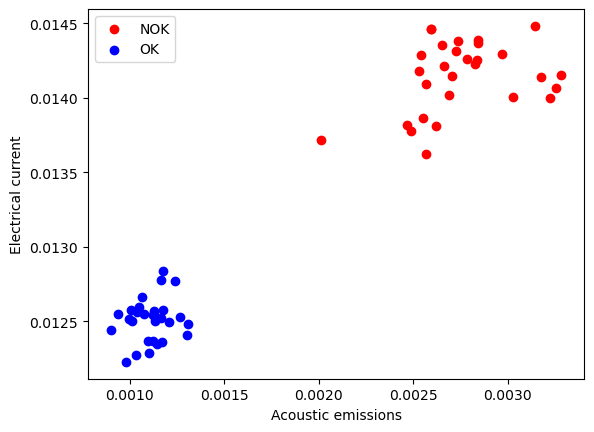

In [2]:
# Visualise NOK and OK data on a scatterplot based on their AE and electrical current variances
import matplotlib.pyplot as plt

# Your data
NOK = [(0.0028296275479566097, 0.014225336147977692), (0.0025403901100845773, 0.014285415728576606), (0.003284743051442009, 0.014154141963688964), (0.0028388447349663483, 0.01425344097406266), (0.0032532512539841327, 0.0140630316986156), (0.002591894957103228, 0.01446113792443867), (0.002467042316464123, 0.013819253075488255), (0.002531819992356944, 0.014177072879180876), (0.0031463365056625366, 0.014481812957741664), (0.002594991911313546, 0.01446085990439814), (0.002702943491755481, 0.014148402793480576), (0.0026884932809742015, 0.014015078889788243), (0.0024883611323317277, 0.013779445295037761), (0.0026521238211728265, 0.01435381357979877), (0.002567981328286485, 0.01409438662297307), (0.0028420519560204416, 0.01436555816753231), (0.003224112724682866, 0.013997449229112323), (0.003028279377849808, 0.014004681966214315), (0.0025529871261725, 0.013865142804941789), (0.0027370362591317803, 0.014381357498402173), (0.0026197543252467572, 0.013808782238134), (0.0027246569453064796, 0.014314598266030385), (0.0020108632555797938, 0.013717034564060237), (0.0029697552763109864, 0.01429320212759015), (0.0025685969609581835, 0.013618833636833083), (0.002661970532927792, 0.014214397312865739), (0.00278271885969162, 0.014256485591874427), (0.0028420521056244704, 0.01438503573852687), (0.0031785202880626686, 0.014141707207245143)]
OK = [(0.0010104664302868155, 0.012500908731426046), (0.0012407814448680103, 0.012771872476754369), (0.001206377559125491, 0.012497193295016477), (0.0011293925157516947, 0.012549793470592811), (0.0010497658235667795, 0.012592764323043735), (0.0010347444048813866, 0.012271675830456592), (0.0011779429916045593, 0.012573666539766675), (0.0012675897313195043, 0.012525029985283022), (0.0008981004747468897, 0.012439446742639132), (0.0010757772612004137, 0.01254844792703595), (0.0011709643074809047, 0.012362396316937562), (0.0011432215987259738, 0.01234387675665428), (0.0010086791813313498, 0.012573594067762879), (0.001125031350823096, 0.012544386857991929), (0.001102064492275446, 0.012287078025579897), (0.0011273009749569402, 0.012569978365785776), (0.0010956693819229508, 0.012368922813270596), (0.0011738892428018457, 0.012839579092809781), (0.0011245998093417117, 0.012364421279676227), (0.001306638599058836, 0.012481423665146853), (0.000995409182455713, 0.012511863553320585), (0.0010663940546236142, 0.0126611852722709), (0.0009797537986520437, 0.012226394931564254), (0.0013010084057364026, 0.01240702597977979), (0.0011624478277766986, 0.012777688378169028), (0.0009388594403718491, 0.012545870447261968), (0.001163521834908076, 0.012520508528447485), (0.0010366794648789725, 0.012564535417860831), (0.0011345750145375073, 0.01250175138867712)]

# Separate the x and y coordinates
NOK_x, NOK_y = zip(*NOK)
OK_x, OK_y = zip(*OK)

# Create a scatter plot
plt.scatter(NOK_x, NOK_y, color='red', label='NOK')
plt.scatter(OK_x, OK_y, color='blue', label='OK')

# Add labels and a legend
plt.xlabel('Acoustic emissions')
plt.ylabel('Electrical current')
plt.legend()

# Show the plot
plt.show()

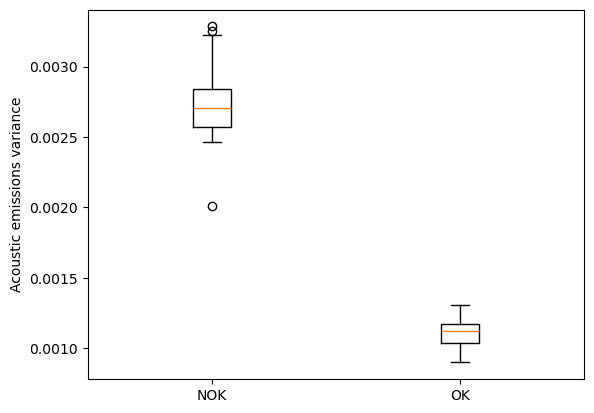

Within-group variance for NOK: 8.010811068876522e-08
Within-group variance for OK: 1.0342229803882876e-08
Between-group variance: 1.3512860750192426e-06
Ratio of between-group variance to within-group variance: 14.939535524789722


In [7]:
# Visualise NOK and OK data on a scatterplot based on their AE variances
import matplotlib.pyplot as plt
import numpy as np

# Your data
NOK = [0.0028296275479566097, 0.0025403901100845773, 0.003284743051442009, 0.0028388447349663483, 0.0032532512539841327, 0.002591894957103228, 0.002467042316464123, 0.002531819992356944, 0.0031463365056625366, 0.002594991911313546, 0.002702943491755481, 0.0026884932809742015, 0.0024883611323317277, 0.0026521238211728265, 0.002567981328286485, 0.0028420519560204416, 0.003224112724682866, 0.003028279377849808, 0.0025529871261725, 0.0027370362591317803, 0.0026197543252467572, 0.0027246569453064796, 0.0020108632555797938, 0.0029697552763109864, 0.0025685969609581835, 0.002661970532927792, 0.00278271885969162, 0.0028420521056244704, 0.0031785202880626686]
OK = [0.0010104664302868155, 0.0012407814448680103, 0.001206377559125491, 0.0011293925157516947, 0.0010497658235667795, 0.0010347444048813866, 0.0011779429916045593, 0.0012675897313195043, 0.0008981004747468897, 0.0010757772612004137, 0.0011709643074809047, 0.0011432215987259738, 0.0010086791813313498, 0.001125031350823096, 0.001102064492275446, 0.0011273009749569402, 0.0010956693819229508, 0.0011738892428018457, 0.0011245998093417117, 0.001306638599058836, 0.000995409182455713, 0.0010663940546236142, 0.0009797537986520437, 0.0013010084057364026, 0.0011624478277766986, 0.0009388594403718491, 0.001163521834908076, 0.0010366794648789725, 0.0011345750145375073]

# Create a boxplot
plt.boxplot([NOK, OK], labels=['NOK', 'OK'])

# Add labels
plt.ylabel('Acoustic emissions variance')

# Show the plot
plt.show()

# Calculate the within-group variances
var_NOK = np.var(NOK, ddof=1)
var_OK = np.var(OK, ddof=1)

# Calculate the between-group variance
mean_NOK = np.mean(NOK)
mean_OK = np.mean(OK)
var_between = np.var([mean_NOK, mean_OK], ddof=1)

# Calculate the ratio of between-group variance to within-group variance
ratio = var_between / (var_NOK + var_OK)

print(f"Within-group variance for NOK: {var_NOK}")
print(f"Within-group variance for OK: {var_OK}")
print(f"Between-group variance: {var_between}")
print(f"Ratio of between-group variance to within-group variance: {ratio}")


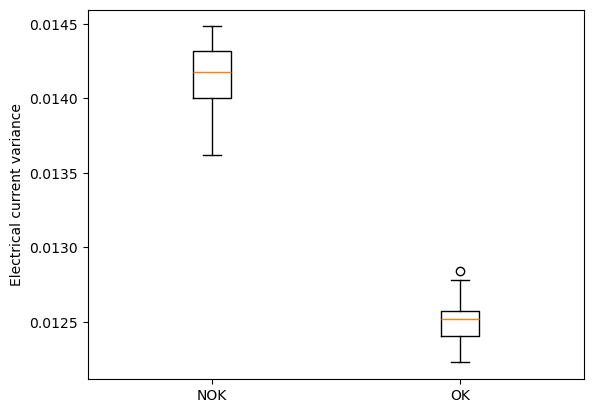

Within-group variance for NOK: 5.6588977685624725e-08
Within-group variance for OK: 2.1180957434811756e-08
Between-group variance: 1.33653449041867e-06
Ratio of between-group variance to within-group variance: 17.185747787353545


In [8]:
# Visualise NOK and OK data on a scatterplot based on their electrical current variances
import matplotlib.pyplot as plt
import numpy as np

# Your data
NOK = [0.014225336147977692, 0.014285415728576606, 0.014154141963688964, 0.01425344097406266, 0.0140630316986156, 0.01446113792443867, 0.013819253075488255, 0.014177072879180876, 0.014481812957741664, 0.01446085990439814, 0.014148402793480576, 0.014015078889788243, 0.013779445295037761, 0.01435381357979877, 0.01409438662297307, 0.01436555816753231, 0.013997449229112323, 0.014004681966214315, 0.013865142804941789, 0.014381357498402173, 0.013808782238134, 0.014314598266030385, 0.013717034564060237, 0.01429320212759015, 0.013618833636833083, 0.014214397312865739, 0.014256485591874427, 0.01438503573852687, 0.014141707207245143]
OK = [0.012500908731426046, 0.012771872476754369, 0.012497193295016477, 0.012549793470592811, 0.012592764323043735, 0.012271675830456592, 0.012573666539766675, 0.012525029985283022, 0.012439446742639132, 0.01254844792703595, 0.012362396316937562, 0.01234387675665428, 0.012573594067762879, 0.012544386857991929, 0.012287078025579897, 0.012569978365785776, 0.012368922813270596, 0.012839579092809781, 0.012364421279676227, 0.012481423665146853, 0.012511863553320585, 0.0126611852722709, 0.012226394931564254, 0.01240702597977979, 0.012777688378169028, 0.012545870447261968, 0.012520508528447485, 0.012564535417860831, 0.01250175138867712]

# Create a boxplot
plt.boxplot([NOK, OK], labels=['NOK', 'OK'])

# Add labels
plt.ylabel('Electrical current variance')

# Show the plot
plt.show()

# Calculate the within-group variances
var_NOK = np.var(NOK, ddof=1)
var_OK = np.var(OK, ddof=1)

# Calculate the between-group variance
mean_NOK = np.mean(NOK)
mean_OK = np.mean(OK)
var_between = np.var([mean_NOK, mean_OK], ddof=1)

# Calculate the ratio of between-group variance to within-group variance
ratio = var_between / (var_NOK + var_OK)

print(f"Within-group variance for NOK: {var_NOK}")
print(f"Within-group variance for OK: {var_OK}")
print(f"Between-group variance: {var_between}")
print(f"Ratio of between-group variance to within-group variance: {ratio}")
